In [608]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [609]:
#Read in the csv file and convert to a Pandas dataframe'
filename = r"data/dataset.csv"
df = pd.read_csv(filename)

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [610]:
df.head()

,title,brand,author,cover,publication_date,category,reviews,num_pages,price,img_url,Language,url
0,Yes or No,هاربر كولينز,‎Spencer Johnson‎,Paperback,1993,تطوير الذات,Not found,‎112‎ Pages‎,79,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/0/2/8/0/0280f149fad0ca38398bb06aa34023437f290397_637449.jpg",انجليزي,NaN
1,Words to Inspire You Every Day!,The Happy Book Company,‎Staffs of Happy Book Company‎,Spiral Bound Cover,2024,تطوير الذات,Not found,‎365‎ Pages‎,69,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/8/b/8/b/8b8b542f6237970b35abd9b6861125bfe1451c19_644417.jpg",انجليزي,NaN
2,Believe In You,The Happy Book Company,‎Staffs of Happy Book Company‎,Spiral Bound Cover,2024,تطوير الذات,Not found,‎365‎ Pages‎,69,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/2/3/0/5/230559b1a444c460c0bf949756d699e40dd9c72c_644423.jpg",انجليزي,NaN
3,Is it Me,دار علبز النشر العربي,‎Lara Majdi Samhan‎,Paperback,2022,تطوير الذات,17,‎155‎ Pages‎,35,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/7/a/6/0/7a60ec70322c24f989b72bf452516cbe6a0f7f7a_590250.jpg",انجليزي,NaN
4,The Secret,سيمون وشوستر,‎Rhonda Byrne‎,Hardcover,2006,تطوير الذات,4,‎صفحة208‎,115,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1images/3/0/306076.jpg",انجليزي,NaN


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [611]:
df.shape

(3662, 12)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [612]:
df.drop(columns=["brand", "reviews", "url"], inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [613]:
df[df.duplicated()]

,title,author,cover,publication_date,category,num_pages,price,img_url,Language
127,Not found,Not found,Not found,Not found,تطوير الذات,Not found,Not found,Not found,انجليزي
180,Not found,Not found,Not found,Not found,دراسات اسلامية,Not found,Not found,Not found,انجليزي
185,Not found,Not found,Not found,Not found,دراسات اسلامية,Not found,Not found,Not found,انجليزي
187,Not found,Not found,Not found,Not found,دراسات اسلامية,Not found,Not found,Not found,انجليزي
214,Not found,Not found,Not found,Not found,دراسات اسلامية,Not found,Not found,Not found,انجليزي
...,...,...,...,...,...,...,...,...,...
3634,Not found,Not found,Not found,Not found,Not found,Not found,Not found,Not found,عربي
3637,Not found,Not found,Not found,Not found,Not found,Not found,Not found,Not found,عربي
3649,Not found,Not found,Not found,Not found,Not found,Not found,Not found,Not found,عربي
3658,Not found,Not found,Not found,Not found,Not found,Not found,Not found,Not found,عربي


In [614]:
# go to delete duplicates columns
df.drop_duplicates(inplace=True)

In [615]:
df.shape

(3295, 9)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [616]:
df["category"].value_counts()

العلوم والرياضيات                                                                                 765
الكتب الطبية,                                                                                     564
القصة والرواية,                                                                                   292
الادارة والاعمال                                                                                  248
تطوير الذات                                                                                       131
                                                                                                 ... 
كتب حولت لأفلام,  الأدب والشعر,  الخيال العلمي,                                                     1
القصة والرواية,  الأدب والشعر,  وصل حديثاً                                                          1
القصة والرواية,  الأدب والشعر,  وصل حديثاً,                                                         1
وصل حديثاً,  القصة والرواية,  الأدب والشعر                                        

In [617]:
#Display number missing values per column
df[df["publication_date"]== "Not found"].head()

,title,author,cover,publication_date,category,num_pages,price,img_url,Language
58,Not found,Not found,Not found,Not found,تطوير الذات,Not found,Not found,Not found,انجليزي
133,Not found,Not found,Not found,Not found,دراسات اسلامية,Not found,Not found,Not found,انجليزي
261,Not found,Not found,Not found,Not found,الادارة والاعمال,Not found,Not found,Not found,انجليزي
324,Not found,Not found,Not found,Not found,العلوم والرياضيات,Not found,Not found,Not found,انجليزي
1176,Not found,Not found,Not found,Not found,الادارة والاعمال,Not found,Not found,Not found,عربي


In [618]:
df_b = df[df["category"]== "الادارة والاعمال"]
df_b["publication_date"].value_counts()

Not found    34
2016         27
2015         23
2023         22
2014         17
2022         17
2020         15
2021         15
2024         14
2019         11
2017         10
2018         10
2011          7
2012          7
2013          6
2009          4
2010          3
2008          2
2003          1
2004          1
2006          1
2005          1
Name: publication_date, dtype: int64

In [619]:
df["publication_date"] = df["publication_date"].replace("Not found", 2016)

In [620]:
df[df["publication_date"]== "Not found"]

,title,author,cover,publication_date,category,num_pages,price,img_url,Language


In [621]:
df = df[df["title"] != "Not found"]

In [622]:
df[df["price"]== "Not found"]

,title,author,cover,publication_date,category,num_pages,price,img_url,Language
592,Fourier Analysis and Nonlinear Partial Differential Equations,"Bahouri, Hajer",غلاف ورقي,2013,العلوم والرياضيات,540 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/a/5/a/3/a5a37320141a64082e1bc833a792a2a817d2086f_9783642266577.jpg",انجليزي
602,The -Calculus,Tasi,غلاف ورقي,2014,العلوم والرياضيات,144 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/5/c/4/8/5c4801541928842238fbda5ed20265fdf8156fd4_9783639664904.jpg",انجليزي
607,Categories,"Schubert, Horst",غلاف ورقي,2011,العلوم والرياضيات,404 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/a/b/5/2/ab52cca9a676da81e1095901617497b7ce2e339b_9783642653667.jpg",انجليزي
608,Selecta,"Hlawka, Edmund",غلاف ورقي,2013,العلوم والرياضيات,560 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/6/a/f/b/6afbc6de1d5d9f4978a8cee449ad989f388c95d9_9783642346224.jpg",انجليزي
621,Battle Damage Assessment,"Rios, Armando",غلاف ورقي,2009,العلوم والرياضيات,76 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/7/0/c/4/70c43453b48b859c0dd982d3d157c438594ed313_9783639177367.jpg",انجليزي
...,...,...,...,...,...,...,...,...,...
1072,Statistical Modelling,"Decarli, Adriano",غلاف ورقي,1989,العلوم والرياضيات,356 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/6/7/5/7/67571291fb9329302233b277851d3fe222be0d86_9780387970974.jpg",انجليزي
1074,Dynamics Reported,"Springer, J.",غلاف ورقي,2011,العلوم والرياضيات,252 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/6/8/a/4/68a4d917aaf4595978862fa8f3c61094b70f2b57_9783642647550.jpg",انجليزي
1078,Multivariate Time Series,"Zahan, Rifat",غلاف ورقي,2011,العلوم والرياضيات,112 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/3/3/4/9/33499186956192d1f2627cd8b06221ca63211b2e_9783639333473.jpg",انجليزي
1092,Statistical Decision Theory,"Longford, Nicholas T.",غلاف ورقي,2013,العلوم والرياضيات,136 Pages,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/1/e/0/4/1e04cebdf23b4266ac587c4b1b2bf0843c1b9c9d_9783642404320.jpg",انجليزي


In [623]:
# go to clean them 
df.shape

(3286, 9)

In [624]:
pd.set_option('display.max_colwidth', None)
df.head()

,title,author,cover,publication_date,category,num_pages,price,img_url,Language
0,Yes or No,‎Spencer Johnson‎,Paperback,1993,تطوير الذات,‎112‎ Pages‎,79,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/0/2/8/0/0280f149fad0ca38398bb06aa34023437f290397_637449.jpg",انجليزي
1,Words to Inspire You Every Day!,‎Staffs of Happy Book Company‎,Spiral Bound Cover,2024,تطوير الذات,‎365‎ Pages‎,69,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/8/b/8/b/8b8b542f6237970b35abd9b6861125bfe1451c19_644417.jpg",انجليزي
2,Believe In You,‎Staffs of Happy Book Company‎,Spiral Bound Cover,2024,تطوير الذات,‎365‎ Pages‎,69,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/2/3/0/5/230559b1a444c460c0bf949756d699e40dd9c72c_644423.jpg",انجليزي
3,Is it Me,‎Lara Majdi Samhan‎,Paperback,2022,تطوير الذات,‎155‎ Pages‎,35,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/7/a/6/0/7a60ec70322c24f989b72bf452516cbe6a0f7f7a_590250.jpg",انجليزي
4,The Secret,‎Rhonda Byrne‎,Hardcover,2006,تطوير الذات,‎صفحة208‎,115,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1images/3/0/306076.jpg",انجليزي


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [625]:
# check columns types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3661
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             3286 non-null   object
 1   author            3286 non-null   object
 2   cover             3286 non-null   object
 3   publication_date  3286 non-null   object
 4   category          3286 non-null   object
 5   num_pages         3286 non-null   object
 6   price             3286 non-null   object
 7   img_url           3286 non-null   object
 8   Language          3286 non-null   object
dtypes: object(9)
memory usage: 256.7+ KB


In [626]:
df["category"] = df["category"].str.rstrip(',')
df["category"] = df["category"].str.replace("أ", "ا")


In [627]:
df["category"].value_counts()

العلوم والرياضيات                                                                                764
الكتب الطبية                                                                                     564
القصة والرواية                                                                                   406
الادارة والاعمال                                                                                 246
تطوير الذات                                                                                      130
                                                                                                ... 
الافضل مبيعاً,  العلوم الاجتماعية والسياسية                                                        1
التراجم والسير,  الهوايات والاشغال اليدوية,  وصل حديثاً                                            1
القصة والرواية,  وصل حديثاً,  التراجم والسير                                                       1
وصل حديثاً,  القانون,  الافضل مبيعاً                                                       

In [628]:
df['category'].value_counts()

العلوم والرياضيات                                                                                764
الكتب الطبية                                                                                     564
القصة والرواية                                                                                   406
الادارة والاعمال                                                                                 246
تطوير الذات                                                                                      130
                                                                                                ... 
الافضل مبيعاً,  العلوم الاجتماعية والسياسية                                                        1
التراجم والسير,  الهوايات والاشغال اليدوية,  وصل حديثاً                                            1
القصة والرواية,  وصل حديثاً,  التراجم والسير                                                       1
وصل حديثاً,  القانون,  الافضل مبيعاً                                                       

In [629]:
categories = (
    df['category']
    .str.replace(r",\s*", ",", regex=True)  # Normalize spaces after commas
    .str.rstrip(",")                       # Remove trailing commas
    .str.get_dummies(sep=',')              # Create dummy variables
)

categories

,إصدارات مكتبة جرير,الادارة والاعمال,الادب والشعر,الافضل مبيعاً,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,الهوايات والاشغال اليدوية,تطوير الذات,دراسات اسلامية,كتب إلكترونية,كتب حائزة على جوائز,كتب حولت لافلام,كتب قيمة بسعر مخفض,مراجع الاختبارات والشهادات,معاجم وقواميس,وصل حديثاً
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3656,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3657,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3660,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [630]:
categories.columns

Index(['إصدارات مكتبة جرير', 'الادارة والاعمال', 'الادب والشعر',
       'الافضل مبيعاً', 'التاريخ والجغرافيا', 'التراجم والسير',
       'التقنية والكمبيوتر', 'الخيال العلمي', 'العلوم الاجتماعية والسياسية',
       'العلوم والرياضيات', 'القانون', 'القصة والرواية', 'الكتب الطبية',
       'الهوايات والاشغال اليدوية', 'تطوير الذات', 'دراسات اسلامية',
       'كتب إلكترونية', 'كتب حائزة على جوائز', 'كتب حولت لافلام',
       'كتب قيمة بسعر مخفض', 'مراجع الاختبارات والشهادات', 'معاجم وقواميس',
       'وصل حديثاً'],
      dtype='object')

In [631]:
usless_cate= ["إصدارات مكتبة جرير", "كتب قيمة بسعر مخفض", "مراجع الاختبارات والشهادات"]

In [632]:
categories.drop(columns=usless_cate, inplace=True)

In [633]:
cols = list(categories.columns)

In [634]:
categories.shape

(3286, 20)

In [635]:
df.shape

(3286, 9)

In [636]:
df = pd.concat([df, categories], axis=1)  # `ignore_index` resets the index
df.head()

,title,author,cover,publication_date,category,num_pages,price,img_url,Language,الادارة والاعمال,الادب والشعر,الافضل مبيعاً,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,الهوايات والاشغال اليدوية,تطوير الذات,دراسات اسلامية,كتب إلكترونية,كتب حائزة على جوائز,كتب حولت لافلام,معاجم وقواميس,وصل حديثاً
0,Yes or No,‎Spencer Johnson‎,Paperback,1993,تطوير الذات,‎112‎ Pages‎,79,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/0/2/8/0/0280f149fad0ca38398bb06aa34023437f290397_637449.jpg",انجليزي,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Words to Inspire You Every Day!,‎Staffs of Happy Book Company‎,Spiral Bound Cover,2024,تطوير الذات,‎365‎ Pages‎,69,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/8/b/8/b/8b8b542f6237970b35abd9b6861125bfe1451c19_644417.jpg",انجليزي,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Believe In You,‎Staffs of Happy Book Company‎,Spiral Bound Cover,2024,تطوير الذات,‎365‎ Pages‎,69,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/2/3/0/5/230559b1a444c460c0bf949756d699e40dd9c72c_644423.jpg",انجليزي,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Is it Me,‎Lara Majdi Samhan‎,Paperback,2022,تطوير الذات,‎155‎ Pages‎,35,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/7/a/6/0/7a60ec70322c24f989b72bf452516cbe6a0f7f7a_590250.jpg",انجليزي,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,The Secret,‎Rhonda Byrne‎,Hardcover,2006,تطوير الذات,‎صفحة208‎,115,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1images/3/0/306076.jpg",انجليزي,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [637]:
for col in cols:
    true_values = df[df[col] == 1]  # Rows where the column is True
    false_values = df[df[col] == 0]  # Rows where the column is False
    # If True values exceed the threshold, undersample
    if len(true_values) > 350:
        true_values = true_values.sample(n=350, random_state=42)
    
    # Combine undersampled True values with all False values
    df = pd.concat([true_values, false_values])

    # Shuffle the dataset (optional)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    print(f"number of {col} is {categories[col].sum()}")

number of الادارة والاعمال is 252
number of الادب والشعر is 267
number of الافضل مبيعاً is 22
number of التاريخ والجغرافيا is 118
number of التراجم والسير is 122
number of التقنية والكمبيوتر is 194
number of الخيال العلمي is 132
number of العلوم الاجتماعية والسياسية is 127
number of العلوم والرياضيات is 764
number of القانون is 107
number of القصة والرواية is 540
number of الكتب الطبية is 602
number of الهوايات والاشغال اليدوية is 1
number of تطوير الذات is 130
number of دراسات اسلامية is 79
number of كتب إلكترونية is 14
number of كتب حائزة على جوائز is 1
number of كتب حولت لافلام is 10
number of معاجم وقواميس is 2
number of وصل حديثاً is 351


In [638]:
low_cols = ["الافضل مبيعاً", "الهوايات والاشغال اليدوية", "كتب حائزة على جوائز", "كتب إلكترونية", "معاجم وقواميس", "كتب حولت لافلام"]
df.drop(columns= low_cols, inplace=True)

In [639]:
df.shape

(2430, 23)

In [640]:
# go to clean them 
df["publication_date"].astype("i")

0       2017
1       2024
2       2020
3       2015
4       2008
        ... 
2425    2017
2426    2017
2427    2019
2428    2009
2429    2011
Name: publication_date, Length: 2430, dtype: int32

In [641]:
df["num_pages"] = df["num_pages"].apply(lambda x: x.replace("Pages", ""))

In [642]:
df["num_pages"] = df["num_pages"].apply(lambda x: x.replace("صفحة", ""))

In [643]:
df["num_pages"] = df["num_pages"].apply(lambda x: x.replace("ورقة", ""))

In [644]:
df["num_pages"] = df["num_pages"].apply(lambda x: x.replace("pages", ""))

In [645]:
df["num_pages"] = df["num_pages"].apply(lambda x: x.replace("قطعة", ""))

In [646]:
df["num_pages"] = df["num_pages"].apply(lambda x: x.replace("‎", ""))

In [647]:
df_pages = df[df["num_pages"] != "Not found"]
mean = df_pages["num_pages"].astype("i").mean()
mean

367.7989394608926

In [648]:
df["num_pages"] = df["num_pages"].replace("Not found", mean)

In [649]:
df["num_pages"] = df["num_pages"].astype("i")

In [650]:
df["cover"].value_counts()

Paperback                1237
غلاف ورقي                 773
Hardcover                 226
غلاف مقوى                 103
كتاب الكتروني              32
غلاف مقوى فني              21
Spiral Bound Cover         10
Mass Market Paperback       8
Trade Paperback             7
Undefined                   6
Book with CD                2
Flexibound                  2
مجموعة في صندوق             1
DVD-ROM                     1
Book with CD or DVD         1
Name: cover, dtype: int64

In [651]:
df = df[df["cover"] != "DVD-ROM"]


In [652]:
df = df[df["cover"] != "Book with CD or DVD"]


In [653]:
df = df[df["cover"] != "أوديو"]


In [654]:
df = df[df["cover"] != "مجموعة في صندوق"]


In [655]:
df = df[df["cover"] != "Flexibound"]


In [656]:
df = df[df["cover"] != "Book with CD"]
df["cover"].value_counts()


Paperback                1237
غلاف ورقي                 773
Hardcover                 226
غلاف مقوى                 103
كتاب الكتروني              32
غلاف مقوى فني              21
Spiral Bound Cover         10
Mass Market Paperback       8
Trade Paperback             7
Undefined                   6
Name: cover, dtype: int64

In [657]:
df["cover"].replace("Paperback", "غلاف ورقي", inplace=True)
df["cover"].value_counts()


غلاف ورقي                2010
Hardcover                 226
غلاف مقوى                 103
كتاب الكتروني              32
غلاف مقوى فني              21
Spiral Bound Cover         10
Mass Market Paperback       8
Trade Paperback             7
Undefined                   6
Name: cover, dtype: int64

In [658]:
df["cover"].replace("Hardcover", "غلاف مقوى", inplace=True)
df["cover"].value_counts()

غلاف ورقي                2010
غلاف مقوى                 329
كتاب الكتروني              32
غلاف مقوى فني              21
Spiral Bound Cover         10
Mass Market Paperback       8
Trade Paperback             7
Undefined                   6
Name: cover, dtype: int64

In [659]:
df["cover"].replace("Trade Paperback", "غلاف ورقي", inplace=True)
df["cover"].value_counts()

غلاف ورقي                2017
غلاف مقوى                 329
كتاب الكتروني              32
غلاف مقوى فني              21
Spiral Bound Cover         10
Mass Market Paperback       8
Undefined                   6
Name: cover, dtype: int64

In [660]:
df["cover"].replace("Spiral Bound Cover", "غلاف مقوى", inplace=True)
df["cover"].value_counts()

غلاف ورقي                2017
غلاف مقوى                 339
كتاب الكتروني              32
غلاف مقوى فني              21
Mass Market Paperback       8
Undefined                   6
Name: cover, dtype: int64

In [661]:
df["cover"].replace("Mass Market Paperback", "غلاف ورقي", inplace=True)
df["cover"].value_counts()

غلاف ورقي        2025
غلاف مقوى         339
كتاب الكتروني      32
غلاف مقوى فني      21
Undefined           6
Name: cover, dtype: int64

In [662]:
df = df[df["cover"] != "Undefined"]

In [663]:
df.shape

(2417, 23)

In [664]:
df_noPrice = df[df["price"] == "Not found"]
df_noPrice["category"].unique()

array(['العلوم والرياضيات'], dtype=object)

In [665]:
df_math = df[df["category"] == "العلوم والرياضيات"]
df_math.head()

,title,author,cover,publication_date,category,num_pages,price,img_url,Language,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً
3,A First Course in Discrete Mathematics,"Lian, Brian",غلاف ورقي,2015,العلوم والرياضيات,212,195,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/1/9/e/0/19e0317906412ddf9ddbaa143e3b3a0f6ad9314d_9781852332365.jpg",انجليزي,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Numerical Methods for Conservation Laws,"LeVeque, Randall J.",غلاف ورقي,2008,العلوم والرياضيات,232,216,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/8/a/f/b/8afb44cbfb9676e85b3988ca4cf9ba0d7025504b_9783764327231.jpg",انجليزي,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,Electromagnetism Theory & Problems,‎S. L. Kakani‎,غلاف ورقي,2011,العلوم والرياضيات,628,15,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1images/4/3/438348.jpg",انجليزي,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,Design of Passive Filters,"Shukla, Akash",غلاف ورقي,2020,العلوم والرياضيات,52,186,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/2/f/a/9/2fa967883c8ec6513e1710f5ffa16342c49424f5_9786200531254.jpg",انجليزي,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16,Group Theory and Quantum Mechanics,"Waerden, Bartel L. Van Der",غلاف ورقي,2011,العلوم والرياضيات,224,Not found,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/9/b/1/0/9b10d53602b2e70202c05fb64917043b6abb78d9_9783642658624.jpg",انجليزي,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [666]:
df_math = df_math[df_math["price"] != "Not found"]
df_math["price"].unique()

array(['195', '216', '15', '186', '79', '210', '82', '78', '147.86',
       '389', '432', '475', '335', '349', '35', '30', '69', '168', '345',
       '189', '949', '256', '139', '229', '275', '45', '249', '388',
       '359', '199', '367', '57', '471', '29', '49', '125', '449', '89',
       '99', '299', '302', '173', '179', '269', '285', '317', '690',
       '143', '518', '373', '387', '40', '324', '604', '59', '121', '19',
       '55', '135', '219', '67.85', '151', '557', '399', '346', '499',
       '147', '279', '395', '149', '9', '259', '39', '1,294', '1,079',
       '12', '56.35', '295', '443', '405', '134', '109', '729', '368',
       '65', '119', '326', '252', '376', '164', '647', '643', '289',
       '169', '113'], dtype=object)

In [667]:
df_math["price"] = df_math["price"].apply(lambda x: x.replace(",", ""))

In [668]:
df_math["price"] = df_math["price"].astype("f")

In [669]:
mean = df_math["price"].mean()
mean

245.80020141601562

In [670]:
df["price"] = df["price"].replace("Not found", mean)

In [671]:
df["price"] = df["price"].apply(lambda x: str(x).replace(",", ""))
df["price"] = df["price"].astype("f")

In [672]:
df.describe()

,num_pages,price,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,365.089781,97.299942,0.104261,0.109226,0.048821,0.050476,0.079024,0.054199,0.052544,0.143980,0.044270,0.144808,0.143153,0.053786,0.031444,0.120811
std,262.265032,107.915909,0.305663,0.311987,0.215538,0.218970,0.269831,0.226458,0.223168,0.351142,0.205736,0.351980,0.350301,0.225641,0.174550,0.325975
min,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,215.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,314.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,416.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4550.000000,1294.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([1.964e+03, 3.660e+02, 7.000e+01, 9.000e+00, 4.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  24. ,  476.6,  929.2, 1381.8, 1834.4, 2287. , 2739.6, 3192.2,
        3644.8, 4097.4, 4550. ]),
 <BarContainer object of 10 artists>)

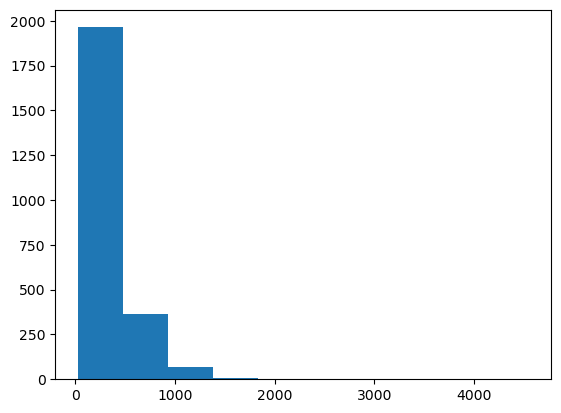

In [673]:
# check outliers 
plt.hist(df["num_pages"])

In [674]:
df = df[df["num_pages"] < 1500]

(array([1.935e+03, 3.030e+02, 1.050e+02, 4.200e+01, 9.000e+00, 5.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   2. ,  131.2,  260.4,  389.6,  518.8,  648. ,  777.2,  906.4,
        1035.6, 1164.8, 1294. ], dtype=float32),
 <BarContainer object of 10 artists>)

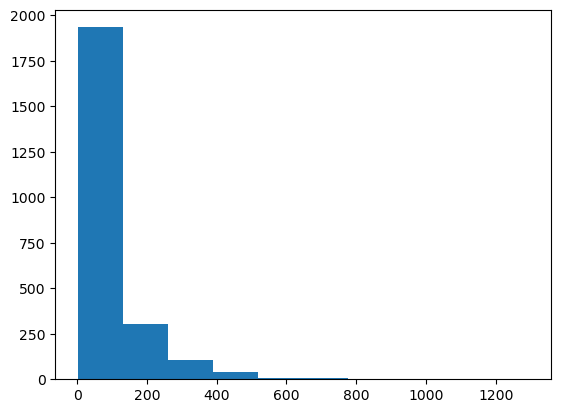

In [675]:
plt.hist(df["price"])

In [676]:
df = df[df["price"] < 600]

# Model Building

In [677]:
df.head()

,title,author,cover,publication_date,category,num_pages,price,img_url,Language,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً
0,Basic Concepts in Pharmacology,‎Janet Stringer‎,غلاف ورقي,2017,الكتب الطبية,367,99.0,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1images/5/0/508802.jpg",انجليزي,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,‎الصدف السوداء‎,‎ندى سمير شرف‎,غلاف ورقي,2024,الادب والشعر,328,69.0,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/4/9/c/2/49c2c2785f5d2cec1202d57fa239b592eb3087bc_644731.jpg",عربي,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,No Filter - The Inside Story of Instagram,‎Sarah Frier‎,غلاف ورقي,2020,القصة والرواية,336,69.0,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1/delta/549063.jpg",انجليزي,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,A First Course in Discrete Mathematics,"Lian, Brian",غلاف ورقي,2015,العلوم والرياضيات,212,195.0,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/1/9/e/0/19e0317906412ddf9ddbaa143e3b3a0f6ad9314d_9781852332365.jpg",انجليزي,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Numerical Methods for Conservation Laws,"LeVeque, Randall J.",غلاف ورقي,2008,العلوم والرياضيات,232,216.0,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/8/a/f/b/8afb44cbfb9676e85b3988ca4cf9ba0d7025504b_9783764327231.jpg",انجليزي,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [678]:
df.drop(columns="category", inplace=True)

In [679]:
titles = df["title"]
df.drop(columns="title", inplace=True)

In [680]:
authors = df["author"]
df.drop(columns="author", inplace=True)

In [681]:
image_urls = df["img_url"]
df.drop(columns="img_url", inplace=True)

In [682]:
df_model = pd.get_dummies(df, columns=["cover", "Language"])
df_model.head()

,publication_date,num_pages,price,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً,cover_غلاف مقوى,cover_غلاف مقوى فني,cover_غلاف ورقي,cover_كتاب الكتروني,Language_انجليزي,Language_عربي
0,2017,367,99.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1,2024,328,69.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2020,336,69.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,2015,212,195.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
4,2008,232,216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


### Normalize features

In [683]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

### k-maens

In [684]:
from sklearn.cluster import KMeans

# Initialize and fit the model
kmeans = KMeans(n_clusters=3, random_state=41)
kmeans.fit(scaled_data)

# Get the cluster labels
labels = kmeans.labels_

# Add labels to the original data
df_model['Cluster'] = labels

### Evaluate Model

In [685]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering
score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.17288573041914135


### Visualize the model

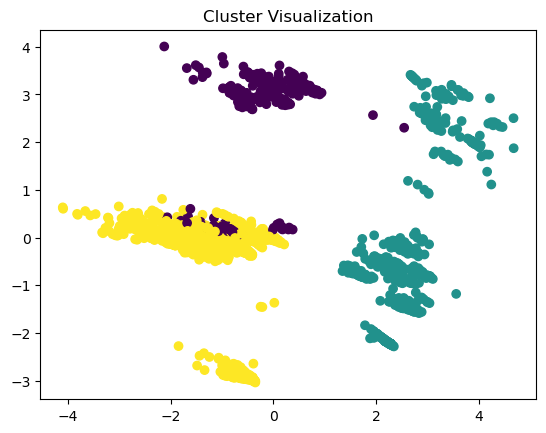

In [686]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title("Cluster Visualization")
plt.show()

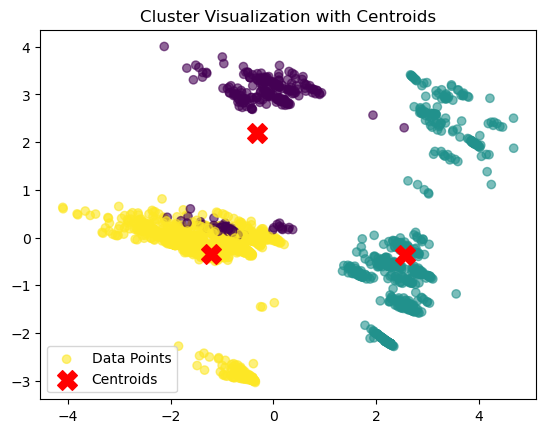

In [687]:
# Reduce centroids to 2D
centroids = pca.transform(kmeans.cluster_centers_)

# Scatter plot with centroids
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Cluster Visualization with Centroids")
plt.legend()
plt.show()

### Clusters in the Data Frame

In [688]:
df_model["Cluster"].value_counts()

2    1368
1     693
0     326
Name: Cluster, dtype: int64

In [689]:
df_model[df_model["Cluster"] == 0]

,publication_date,num_pages,price,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً,cover_غلاف مقوى,cover_غلاف مقوى فني,cover_غلاف ورقي,cover_كتاب الكتروني,Language_انجليزي,Language_عربي,Cluster
57,2002,240,69.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
62,2017,636,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
78,2011,502,9.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
82,2017,367,50.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
93,2022,160,69.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2014,128,25.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2382,2016,160,39.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2394,2017,224,75.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2411,2017,304,55.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


### Save the model

In [690]:
import joblib

# Save the model
#joblib.dump(kmeans, 'kmeans_model.pkl')

### DBASCAN

In [691]:
from sklearn.cluster import DBSCAN

# Initialize and fit the model
dbscan = DBSCAN(eps=3.5, min_samples=10)
labels = dbscan.fit_predict(scaled_data)

# Add labels to the original data
df_model['Cluster'] = labels

In [692]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering
score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5409428612813798


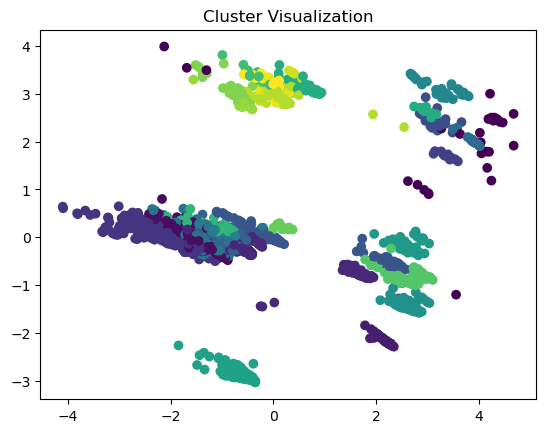

In [693]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title("Cluster Visualization")
plt.show()

In [694]:
df_model["Cluster"].value_counts()

 3     320
 0     309
 2     284
 9     180
 6     167
 1     124
 14    120
 12    111
 7     101
 16     90
 18     86
 22     63
 13     57
 10     53
 15     47
 25     40
 11     39
 8      32
-1      30
 20     29
 17     22
 5      20
 24     20
 19     11
 21     11
 4      11
 23     10
Name: Cluster, dtype: int64

In [695]:
df_model.shape

(2387, 24)

In [696]:
pd.set_option('display.max_columns', None)
df_model[df_model["Cluster"] == 23 ]

,publication_date,num_pages,price,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً,cover_غلاف مقوى,cover_غلاف مقوى فني,cover_غلاف ورقي,cover_كتاب الكتروني,Language_انجليزي,Language_عربي,Cluster
167,2024,304,179.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,23
589,2020,360,99.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,23
810,2014,240,149.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,23
841,2014,422,149.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,23
1093,2023,234,109.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,23
1388,2023,334,149.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,23
2012,2024,160,69.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,23
2097,2023,370,159.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,23
2149,2024,432,149.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,23
2312,2023,386,179.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,23


In [697]:
df_model["image_urls"] = image_urls
df_model.head()

,publication_date,num_pages,price,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً,cover_غلاف مقوى,cover_غلاف مقوى فني,cover_غلاف ورقي,cover_كتاب الكتروني,Language_انجليزي,Language_عربي,Cluster,image_urls
0,2017,367,99.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1images/5/0/508802.jpg"
1,2024,328,69.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/4/9/c/2/49c2c2785f5d2cec1202d57fa239b592eb3087bc_644731.jpg"
2,2020,336,69.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1/delta/549063.jpg"
3,2015,212,195.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/1/9/e/0/19e0317906412ddf9ddbaa143e3b3a0f6ad9314d_9781852332365.jpg"
4,2008,232,216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/8/a/f/b/8afb44cbfb9676e85b3988ca4cf9ba0d7025504b_9783764327231.jpg"


In [698]:
df_model["title"] = titles
df_model.head()

,publication_date,num_pages,price,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً,cover_غلاف مقوى,cover_غلاف مقوى فني,cover_غلاف ورقي,cover_كتاب الكتروني,Language_انجليزي,Language_عربي,Cluster,image_urls,title
0,2017,367,99.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1images/5/0/508802.jpg",Basic Concepts in Pharmacology
1,2024,328,69.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/4/9/c/2/49c2c2785f5d2cec1202d57fa239b592eb3087bc_644731.jpg",‎الصدف السوداء‎
2,2020,336,69.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1/delta/549063.jpg",No Filter - The Inside Story of Instagram
3,2015,212,195.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/1/9/e/0/19e0317906412ddf9ddbaa143e3b3a0f6ad9314d_9781852332365.jpg",A First Course in Discrete Mathematics
4,2008,232,216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=54,height=auto,quality=85,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/8/a/f/b/8afb44cbfb9676e85b3988ca4cf9ba0d7025504b_9783764327231.jpg",Numerical Methods for Conservation Laws


In [699]:
df_model["author"] = authors

In [700]:
df_model['image_urls'] = df_model['image_urls'].str.replace('quality=85', 'quality=100')
df_model['image_urls'] = df_model['image_urls'].str.replace('width=54', 'width=540')
df_model.head()


,publication_date,num_pages,price,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً,cover_غلاف مقوى,cover_غلاف مقوى فني,cover_غلاف ورقي,cover_كتاب الكتروني,Language_انجليزي,Language_عربي,Cluster,image_urls,title,author
0,2017,367,99.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=540,height=auto,quality=100,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1images/5/0/508802.jpg",Basic Concepts in Pharmacology,‎Janet Stringer‎
1,2024,328,69.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=540,height=auto,quality=100,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/4/9/c/2/49c2c2785f5d2cec1202d57fa239b592eb3087bc_644731.jpg",‎الصدف السوداء‎,‎ندى سمير شرف‎
2,2020,336,69.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=540,height=auto,quality=100,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/m1/delta/549063.jpg",No Filter - The Inside Story of Instagram,‎Sarah Frier‎
3,2015,212,195.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=540,height=auto,quality=100,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/1/9/e/0/19e0317906412ddf9ddbaa143e3b3a0f6ad9314d_9781852332365.jpg",A First Course in Discrete Mathematics,"Lian, Brian"
4,2008,232,216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3,"https://www.jarir.com/cdn-cgi/image/fit=contain,width=540,height=auto,quality=100,metadata=none/https://ak-asset.jarir.com/akeneo-prod/asset/ingram/8/a/f/b/8afb44cbfb9676e85b3988ca4cf9ba0d7025504b_9783764327231.jpg",Numerical Methods for Conservation Laws,"LeVeque, Randall J."


In [701]:
df_model.describe()

,num_pages,price,الادارة والاعمال,الادب والشعر,التاريخ والجغرافيا,التراجم والسير,التقنية والكمبيوتر,الخيال العلمي,العلوم الاجتماعية والسياسية,العلوم والرياضيات,القانون,القصة والرواية,الكتب الطبية,تطوير الذات,دراسات اسلامية,وصل حديثاً,cover_غلاف مقوى,cover_غلاف مقوى فني,cover_غلاف ورقي,cover_كتاب الكتروني,Language_انجليزي,Language_عربي,Cluster
count,2387.000000,2387.000000,2387.000000,2387.00000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.00000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000
mean,353.974864,91.746536,0.105572,0.11018,0.048178,0.051110,0.080017,0.054881,0.052786,0.139087,0.043988,0.146628,0.142019,0.054462,0.031839,0.121910,0.139087,0.00796,0.839548,0.013406,0.708840,0.291160,7.643904
std,216.645038,90.368637,0.307353,0.31318,0.214186,0.220269,0.271376,0.227795,0.223653,0.346110,0.205112,0.353808,0.349143,0.226974,0.175608,0.327251,0.346110,0.08888,0.367102,0.115029,0.454392,0.454392,6.872120
min,24.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,214.000000,39.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,312.000000,59.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,6.000000
75%,416.000000,99.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,13.000000
max,1440.000000,557.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,25.000000


In [702]:
df_model[df_model["author"] == "Not found"].shape

(28, 27)

In [703]:
df_model.to_csv("final_dataset.csv")

In [704]:
import joblib
#joblib.dump(dbscan, 'DBSCAN2.joblib')
#joblib.dump(scaler, 'scaler2.joblib')